<a href="https://colab.research.google.com/github/mahmud-nobe/CS110_pcw_2.1/blob/master/cs110_pcw_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Md Mahmudunnobe"
COLLABORATORS = "-"

---

# CS110 Pre-class Work Mergesort and recurrences

## Question 1.

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](https://github.com/mahmud-nobe/CS110_pcw_2.1/blob/master/array.png?raw=1)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


We called the following algorithm:
```
MERGE(A,1,3,6)
```
where A is the array shown in above. 

How this algorithm will work in every step and how the array A, L and R will change in each iteration, is shown below by Illustration.

**Note that, as our subarrays, L = [2,6,7] and R = [8,1,4] was not sorted initially, the final merged output array A[1,6] is also stayed non-sorted.**


**Part 1:** Initialization of Array L and R:
![Merge Illustration 1](https://github.com/mahmud-nobe/CS110_pcw_2.1/raw/master/merge1.jpg)

**Part 2:** Change of Array A, L,R and the variables k,i,j in each iteration of the for loop (panel(a)-(g)):
![Merge Illustration 2](https://github.com/mahmud-nobe/CS110_pcw_2.1/raw/master/merge2.jpg)
![Merge Illustration 3](https://github.com/mahmud-nobe/CS110_pcw_2.1/raw/master/merge3.jpg)

## Question 2.
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python list). Give your answer in prose in the cell below.

When we use Python, we don't need to use a for loop to copy elements in array L and R. If the given array A is a list in python, we can directly copy the first and last elements by the following code:

```
def Merge(A,p,q,r):
  L = A[p:q+1]
  R = A[q+1:r+1]
  L.append(float('INF'))
  R.append(float('INF'))
```



## Question 3.

Write a Python implementation of the merge pseudocode (both parts), your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A 

In [0]:
def merge(A, p, q, r):
  # create two array and copied the elements from Array A
  L = A[p:q+1]
  R = A[q+1:r+1]
  L.append(float('INF'))
  R.append(float('INF'))
    
  # set i,j as the first index. Compare the i'th element of L and j'th element of R array and store the smaller
  # one to the array A. Increase the i/j accordingly.
  # Do this from k = p to r
  i = 0
  j = 0
  for k in range(p,r+1):
    if(L[i] <= R[j]):
      A[k] = L[i]
      i += 1
    else:
      A[k] = R[j]
      j += 1  
  return A

  raise NotImplementedError()
    

In [18]:
A = [2,6,7,8,1,4,6,9]
merge(A, 0, 2, 5)

[2, 6, 7, 8, 1, 4, 6, 9]

In [0]:
merge(A,0,3,7)

[1, 2, 4, 6, 6, 7, 8, 9]

In [0]:
A = [-2,5,78,-6.5, 0,4,7]
merge(A,0,2,6)

[-6.5, -2, 0, 4, 5, 7, 78]

In [0]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4
Suppose that your Python implementation of the merge algorithm is already working. Inspect the code for merge sort below:

In [0]:
def merge_sort(A,p,r):
    if p < r:
        q = (p+r)/2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

Copy and paste the code above to the cell below and fix the bug in it. 

In [0]:
def merge_sort(A,p,r):
  if p < r:
      q = int((p+r)/2)
      merge_sort(A,p,q)
      merge_sort(A,q+1,r)
      merge(A,p,q,r)
  return(A)

  raise NotImplementedError()

In [0]:
import random
A = random.choices(range(100),k=10)
print(A)
print(merge_sort(A,0,len(A)-1))

[46, 46, 1, 0, 67, 52, 73, 62, 45, 34]
[0, 1, 34, 45, 46, 46, 52, 62, 67, 73]


In [0]:
A = [10,9,8,7,6,5,4,3,2,1]
print(merge_sort(A,0,len(A)-1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [0]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

# Question 5.
As in the previous Lesson, count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. 


In [0]:
# First let's test if the algorithm works perfectly
k = 1
list_k = [i for i in range(100*k, 0, -1)]
print(list_k)
print(merge_sort(list_k, 0, len(list_k)-1))

[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [0]:
def counting_merge(A, p, q, r):
  # create two array and copied the elements from Array A
  L = A[p:q+1]
  R = A[q+1:r+1]
  L.append(float('INF'))
  R.append(float('INF'))
    
  # set i,j as the first index. Compare the i'th element of L and j'th element of R array and store the smaller
  # one to the array A. Increase the i/j accordingly.
  # Do this from k = p to r
  i = 0
  j = 0
  for k in range(p,r+1):
    if(L[i] <= R[j]):
      A[k] = L[i]
      i += 1
    else:
      A[k] = R[j]
      j += 1  
  return A

In [0]:
def counting_merge_sort(A,p,r):
  counter = 1 # for conditional check
  if p < r:
      counter += 1  
      q = int((p+r)/2)
      counting_merge_sort(A,p,q)
      counting_merge_sort(A,q+1,r)
      counting_merge(A,p,q,r) 
      counter += r-p+1 # in worst case
  return(A,counter)
  raise NotImplementedError()

In [46]:
import time
for k in range(1,16):
  list_k = [i for i in range(100*k, 0, -1)]
  start = time.clock()
  A, counter = counting_merge_sort(list_k, 0, len(list_k)-1)
  end = time.clock()
  print("K:",k,"Step size:",counter,"Time Elapsed:", end-start)

K: 1 Step size: 102 Time Elapsed: 0.00039999999999906777
K: 2 Step size: 202 Time Elapsed: 0.0006619999999983861
K: 3 Step size: 302 Time Elapsed: 0.0011039999999979955
K: 4 Step size: 402 Time Elapsed: 0.001916000000001361
K: 5 Step size: 502 Time Elapsed: 0.0015290000000049986
K: 6 Step size: 602 Time Elapsed: 0.0020619999999951233
K: 7 Step size: 702 Time Elapsed: 0.0020689999999987663
K: 8 Step size: 802 Time Elapsed: 0.0023550000000014393
K: 9 Step size: 902 Time Elapsed: 0.0028980000000018435
K: 10 Step size: 1002 Time Elapsed: 0.003175999999996293
K: 11 Step size: 1102 Time Elapsed: 0.003340999999998928
K: 12 Step size: 1202 Time Elapsed: 0.003983999999995547
K: 13 Step size: 1302 Time Elapsed: 0.004356000000001359
K: 14 Step size: 1402 Time Elapsed: 0.004512000000005401
K: 15 Step size: 1502 Time Elapsed: 0.00538500000000397


In [0]:
## Having trouble understanding how to set the stepsize for a recursive function

# Question 6. 
Use the code you wrote for Lesson 1.2 (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

#### **Sorting Algorithm**

In [0]:
def insertionSort(A):
  for j in range(1,len(A)):
      key = A[j]
      i= j-1
      while i >= 0 and A[i]>key:
          A[i+1] = A[i]
          i -= 1
      A[i+1] = key
  return A

In [0]:
def bubbleSort(A):
  for i in range(len(A)):
    j = len(A)-1
    while (j > i):
      if (A[j] < A[j-1]):
        temp = A[j]
        A[j] = A[j-1]
        A[j-1] = temp
      j -= 1
  return A

In [0]:
def selectionSort(A):
  n = len(A)
  for i in range(n-1):
    minidx = i
    for j in range(i+1, n):
      if (A[j] < A[minidx]):
        minidx = j
    temp = A[i]
    A[i] = A[minidx]
    A[minidx] = temp
  return A

#### **Graph 2: Counting**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

time_insertion = []
time_bubble = []
time_selection = []
time_merge = []

for k in range(1,16):
  list_k = [i for i in range(100*k, 0, -1)]

  start = time.clock()
  insertionSort(list_k)
  end = time.clock()
  time_insertion.append(end-start)

  start = time.clock()
  bubbleSort(list_k)
  end = time.clock()
  time_bubble.append(end-start)

  start = time.clock()
  selectionSort(list_k)
  end = time.clock()
  time_selection.append(end-start)

  start = time.clock()
  merge_sort(list_k, 0, len(list_k)-1)
  end = time.clock()
  time_merge.append(end-start)



  

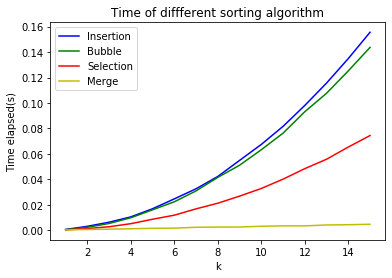

In [34]:
k = range(1,16)
plt.plot(k,time_insertion,'b')
plt.plot(k,time_bubble,'g')
plt.plot(k,time_selection,'r')
plt.plot(k,time_merge,'y')
plt.xlabel('k')
plt.ylabel('Time elapsed(s)')
plt.legend(['Insertion','Bubble','Selection','Merge'])
plt.title("Time of diffferent sorting algorithm")
plt.show()

#### **Sorting Algorithm with step**

In [0]:
def insertionSort(A):
  counter = 1
  for j in range(1,len(A)):
      key = A[j]
      i= j-1
      while i >= 0 and A[i]>key:
          A[i+1] = A[i]
          i -= 1
      A[i+1] = key
  return A

In [0]:
def bubbleSort(A):
  counter = 2 
  for i in range(len(A)):
    counter += 2
    j = len(A)-1
    while (j > i):
      counter += 3 # one for 
      if (A[j] < A[j-1]):
        temp = A[j]
        A[j] = A[j-1]
        A[j-1] = temp
        counter += 3
      j -= 1
  return A

In [0]:
def selectionSort(A):
  n = len(A)
  for i in range(n-1):
    minidx = i
    for j in range(i+1, n):
      if (A[j] < A[minidx]):
        minidx = j
    temp = A[i]
    A[i] = A[minidx]
    A[minidx] = temp
  return A